# Task 1: Exploratory Data Analysis (EDA) and Business **Insights**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Display basic info about each dataset
print("Customers Dataset Info:")
print(customers.info())
print(customers.head())
print("\nProducts Dataset Info:")
print(products.info())
print(products.head())
print("\nTransactions Dataset Info:")
print(transactions.info())
print(transactions.head())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [4]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [5]:
# Merge datasets for analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

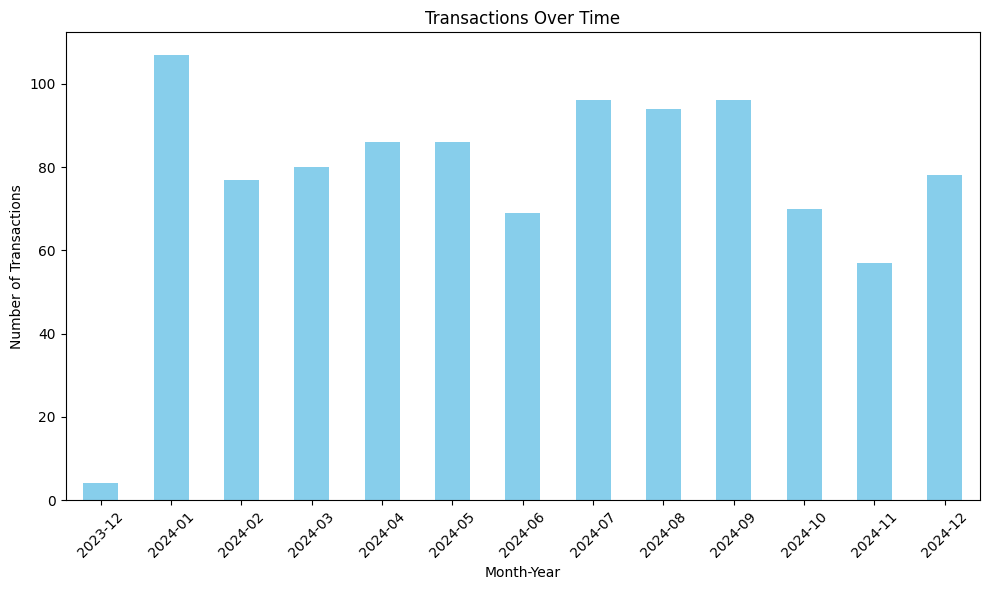

In [6]:
# Task 1: Exploratory Data Analysis (EDA)

# 1. Distribution of transactions over time
plt.figure(figsize=(10, 6))
transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Transactions Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

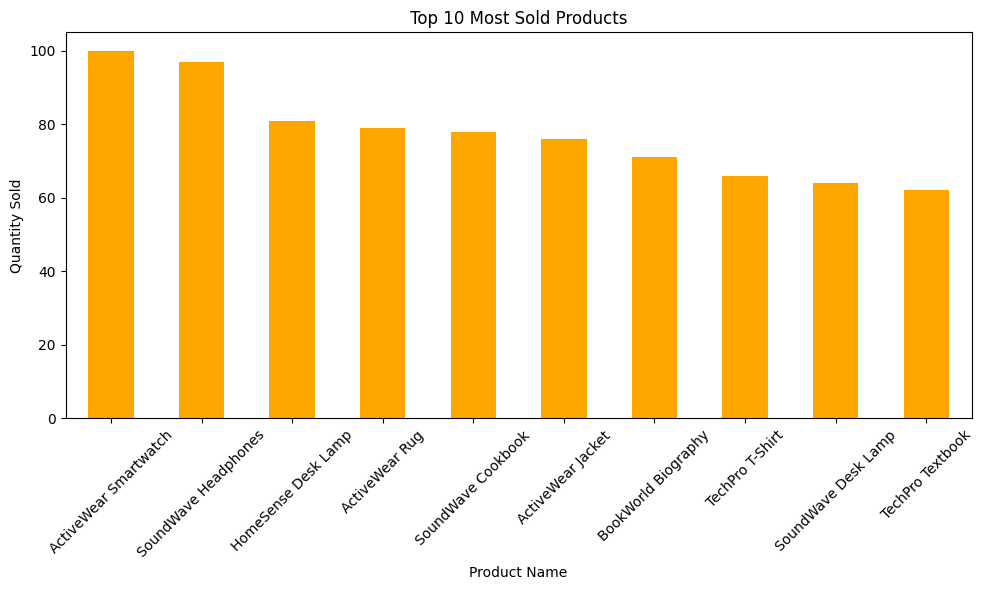

In [7]:
# 2. Top 10 most sold products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

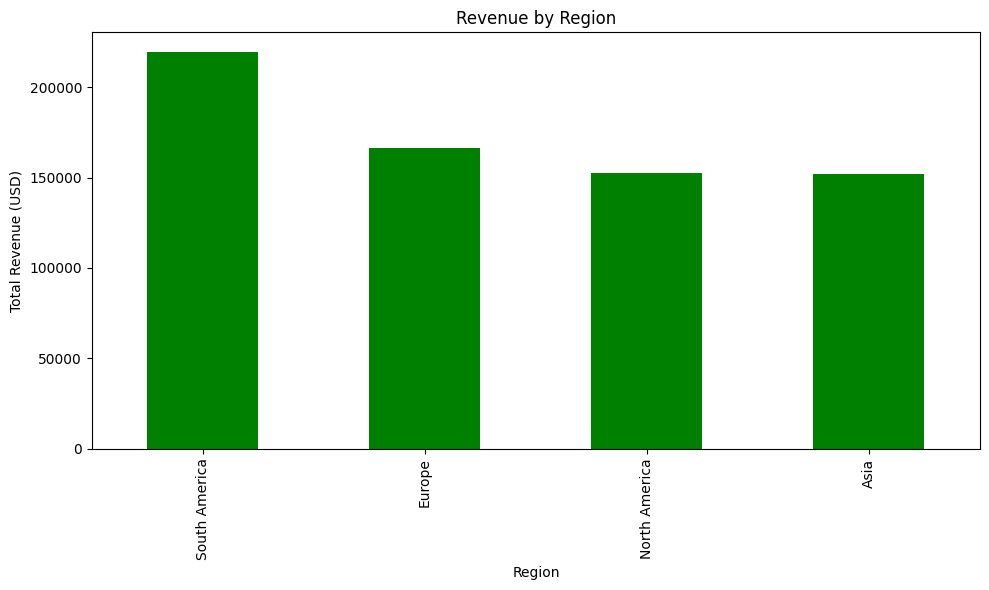

In [8]:
# 3. Revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
revenue_by_region.plot(kind='bar', color='green', figsize=(10, 6))
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.tight_layout()
plt.show()

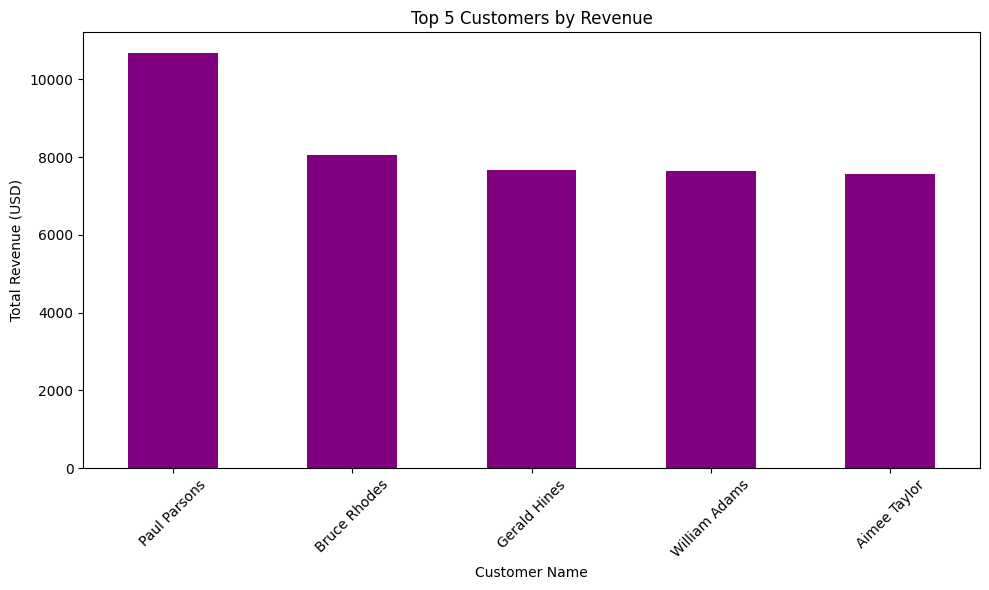

In [9]:
# 4. Top 5 customers by revenue
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
top_customers.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

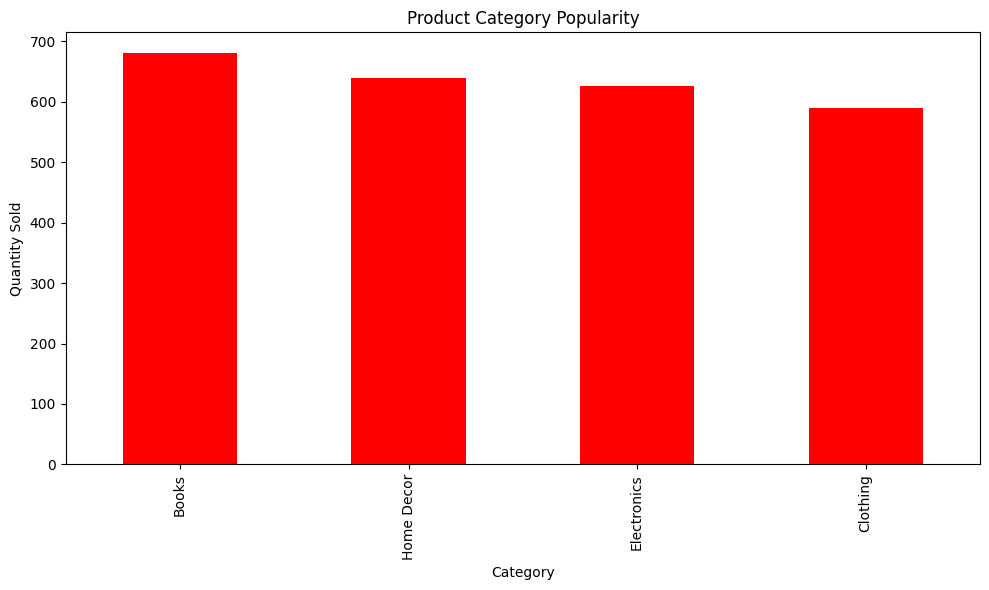

In [10]:
# 5. Product category popularity
category_popularity = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
category_popularity.plot(kind='bar', color='red', figsize=(10, 6))
plt.title("Product Category Popularity")
plt.xlabel("Category")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()